<a href="https://colab.research.google.com/github/fahimalamabir/datatuneanalytics/blob/main/parks%26open.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, let's load and examine the datasets to understand its structure and identify any initial data quality issues. Then, we can proceed with creating visualizations based on our findings.

In [4]:
import geopandas as gpd

shapefile_path = '../content/Parks_and_Open_Spaces.shp'
parks_data = gpd.read_file(shapefile_path)


In [5]:
print(parks_data.head())  # To see the first few rows
print(parks_data.crs)     # To see the Coordinate Reference System of the data




   OBJECTID                  Park_Name            Alias_Name ParkClassC  \
0       150            Maplewood Green       Maplewood Green        GRN   
1       151       Highview Street Park  Highview Street Park         NP   
2       152           Mars Street Park      Mars Street Park         NP   
3       153  Jackson Street Playground   Jackson Street Park         NP   
4       154           Highview Playlot      Highview Playlot         NP   

  BallDiamon Concession DogsOffLea Horticultu LawnBowlin PicnicShel  \
0         No         No         No         No         No         No   
1         No         No         No         No         No         No   
2         No         No         No         No         No         No   
3         No         No         No         No         No         No   
4         No         No         No         No         No         No   

  PlayEquipm SportField TennisCour Trail Washroom WaterView  SHAPE_Leng  \
0         No         No         No    No       

<Axes: >

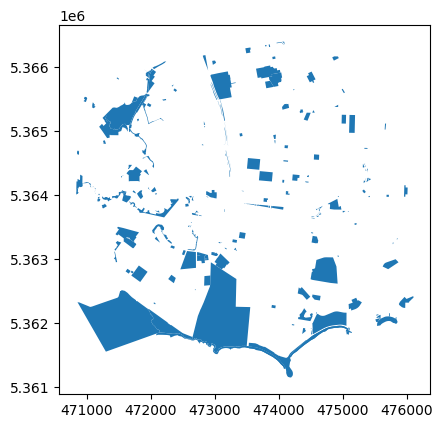

In [6]:
parks_data.plot()

<Axes: >

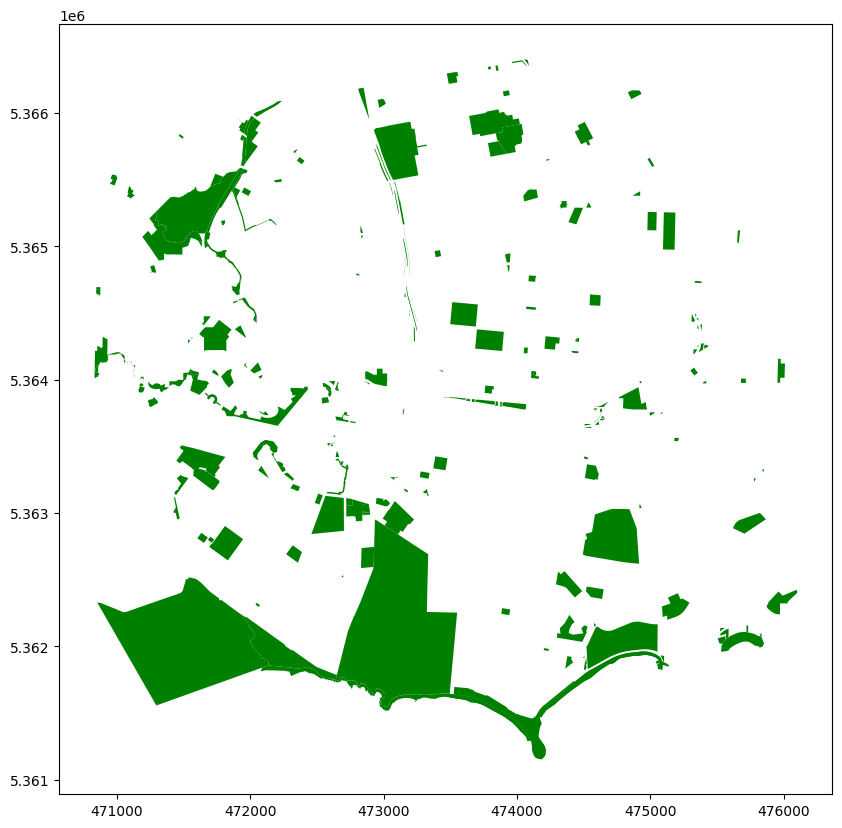

In [7]:
parks_data.plot(figsize=(10, 10), color='green')

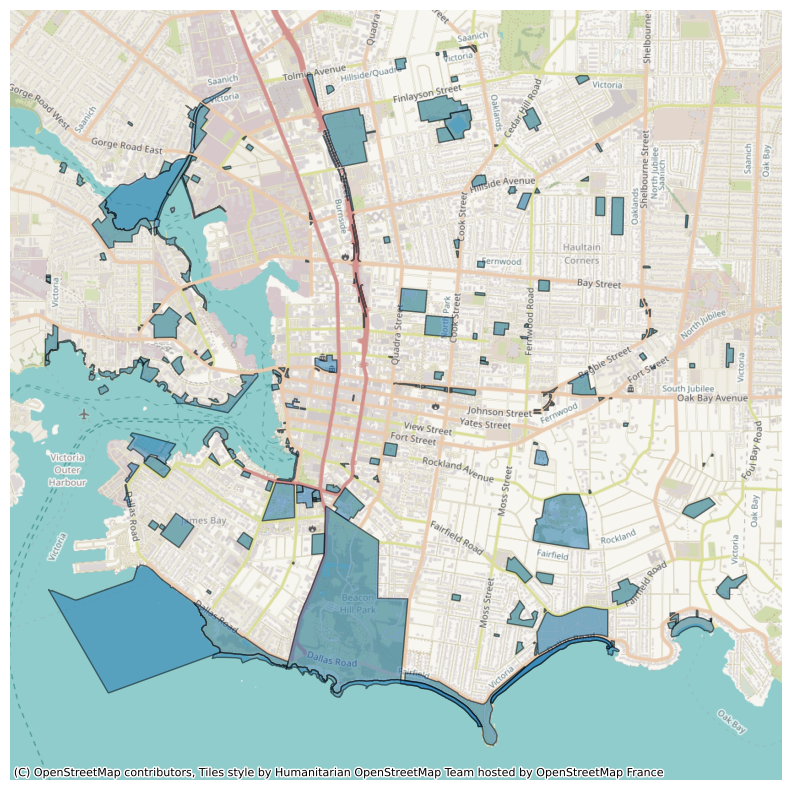

In [10]:
import contextily as ctx

# Plot the data
ax = parks_data.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Add a basemap
ctx.add_basemap(ax)
ax.set_axis_off()

In [34]:
import folium
import geopandas as gpd


# Ensure the CRS is WGS 84 (EPSG:4326)
parks_data = parks_data.to_crs(epsg=4326)

# Create a Folium map centered around an approximate location
m = folium.Map(location=[48.4284, -123.3656], zoom_start=13)

# Add each park as a polygon to the map with detailed information on click
for _, row in parks_data.iterrows():
    # Simplify geometry to make the map load faster, if necessary
    simplified_geom = row['geometry'].simplify(tolerance=0.001, preserve_topology=True)

    # Popup content
    popup_content = f"""
    <strong>OBJECTID:</strong> {row['OBJECTID']}<br>
    <strong>Park Name:</strong> {row['Park_Name']}<br>
    <strong>Alias Name:</strong> {row['Alias_Name']}<br>
    <strong>Park Class Code:</strong> {row['ParkClassC']}<br>
    <strong>Ball Diamond:</strong> {row['BallDiamon']}<br>
    <strong>Concession:</strong> {row['Concession']}<br>
    <strong>Dogs Off Leash:</strong> {row['DogsOffLea']}<br>
    <strong>Horticultural Interest:</strong> {row['Horticultu']}<br>
    <strong>Lawn Bowling:</strong> {row['LawnBowlin']}<br>
    <strong>Picnic Shelter:</strong> {row['PicnicShel']}<br>
    <strong>Play Equipment:</strong> {row['PlayEquipm']}<br>
    <strong>Sport Field:</strong> {row['SportField']}<br>
    <strong>Tennis Court:</strong> {row['TennisCour']}<br>
    <strong>Trail:</strong> {row['Trail']}<br>
    <strong>Washroom:</strong> {row['Washroom']}<br>
    <strong>Water View:</strong> {row['WaterView']}<br>
    <strong>SHAPE Length:</strong> {row['SHAPE_Leng']:.2f} meters<br>
    <strong>SHAPE Area:</strong> {row['SHAPE_Area']:.2f} square meters
    """

    # Create a popup object
    popup = folium.Popup(folium.Html(popup_content, script=True), max_width=300)

    # Create a folium polygon for each park and add to the map
    folium.GeoJson(simplified_geom,
                   style_function=lambda x: {'fillColor': 'green'},
                   popup=popup).add_to(m)

# Save the map
#m.save('parks_map.html')
m

In [35]:
from shapely.geometry import Point

# Example: Define a point of interest - say, Victoria City Hall
poi = Point(-123.3656, 48.4284)  # Long, Lat of Victoria City Hall


In [36]:
# If parks_data is not in WGS 84 (latitude and longitude), convert it
parks_data = parks_data.to_crs(epsg=4326)  # Ensure it's in lat-long

# Calculate distance from each park to the POI (returns distance in degrees)
parks_data['distance_to_poi'] = parks_data['geometry'].apply(lambda x: x.centroid.distance(poi))

# Convert distance from degrees to more interpretable units like kilometers
parks_data['distance_to_poi_km'] = parks_data['distance_to_poi'] * 111.32  # Roughly 111.32 km per degree


In [37]:
nearest_park = parks_data.loc[parks_data['distance_to_poi_km'].idxmin()]
print("Nearest park details:")
print(nearest_park)


Nearest park details:
OBJECTID                                                            236
Park_Name                                             Centennial Square
Alias_Name                                            Centennial Square
ParkClassC                                                           SQ
BallDiamon                                                           No
Concession                                                           No
DogsOffLea                                                           No
Horticultu                                                           No
LawnBowlin                                                           No
PicnicShel                                                           No
PlayEquipm                                                           No
SportField                                                           No
TennisCour                                                           No
Trail                                     

In [38]:
nearest_park = parks_data.loc[parks_data['distance_to_poi_km'].idxmin()]
print("Nearest park details:")
print(nearest_park)


Nearest park details:
OBJECTID                                                            236
Park_Name                                             Centennial Square
Alias_Name                                            Centennial Square
ParkClassC                                                           SQ
BallDiamon                                                           No
Concession                                                           No
DogsOffLea                                                           No
Horticultu                                                           No
LawnBowlin                                                           No
PicnicShel                                                           No
PlayEquipm                                                           No
SportField                                                           No
TennisCour                                                           No
Trail                                     

In [41]:
import folium

# Create a map object centered around Victoria City Hall
city_hall_coords = [48.4284, -123.3656]
m = folium.Map(location=city_hall_coords, zoom_start=13)

# Adding City Hall marker
folium.Marker(
    city_hall_coords,
    popup='City Hall',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

# Add each park to the map with popup showing the park name and distance to City Hall
for index, park in parks_data.iterrows():
    park_location = [park.geometry.centroid.y, park.geometry.centroid.x]
    # Popup content including distance
    popup_content = f"{park['Park_Name']}<br>Distance to City Hall: {park['distance_to_poi_km']:.2f} km"
    folium.Marker(
        park_location,
        popup=popup_content,
        icon=folium.Icon(color='green')
    ).add_to(m)

# Display the map inline in the Jupyter Notebook
m

In [43]:
#!pip install streamlit
#!pip install pyngrok
